# **The DataViz Challenge - Transforming EDA Projects to Dashboards**
-----


##### **Project Type**    - Exploratory Data Analysis (EDA)
##### **Contribution**    - Individual
##### **Name**            - JITESH SACHDEV

# **Problem Statement -**

Superstore collects vast amounts of transactional data from its customers, but it lacks a clear understanding of its diverse customer base. Without effective segmentation and behavior analysis, marketing efforts remain generic, leading to missed opportunities in customer retention, personalized promotions, and revenue maximization. This project aims to address this gap by segmenting customers based on their purchasing patterns and analyzing their behavior to uncover valuable insights. The ultimate goal is to enable data-driven decision-making that enhances customer engagement and business performance.

# **Project Objective -**

The main objective of this project is to perform an Exploratory Data Analysis (EDA) on the dataset of Superstore content to uncover trends, patterns, and insights about the platform’s content library. This contains transactional-level retail data including sales, profit, region, and product details.The Superstore dataset simulates real-world retail operations and is ideal for performing EDA, business analysis, and dashboard visualizations. It helps in understanding customer behavior, regional demand, profitable product categories, and inventory decisions.


# ***Let's Begin !***

### **Import Libraries**

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Dataset Loading**


In [ ]:
# Load Dataset
superstore = pd.read_csv('/content/superstore data.csv', encoding='latin1')

### **Dataset First View**

In [ ]:
# Dataset First Look
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [ ]:
# Dataset Rows & Columns count
superstore.shape

(9994, 21)

In [ ]:
# Dataset Info
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
#Statistical Summary
superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## **Missing Values/Null Values**



In [ ]:
# Missing Values/Null Values Count
superstore.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Convert date columns to datetime
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'], dayfirst=True, errors='coerce')
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'], dayfirst=True, errors='coerce')

## **Data Vizualization**

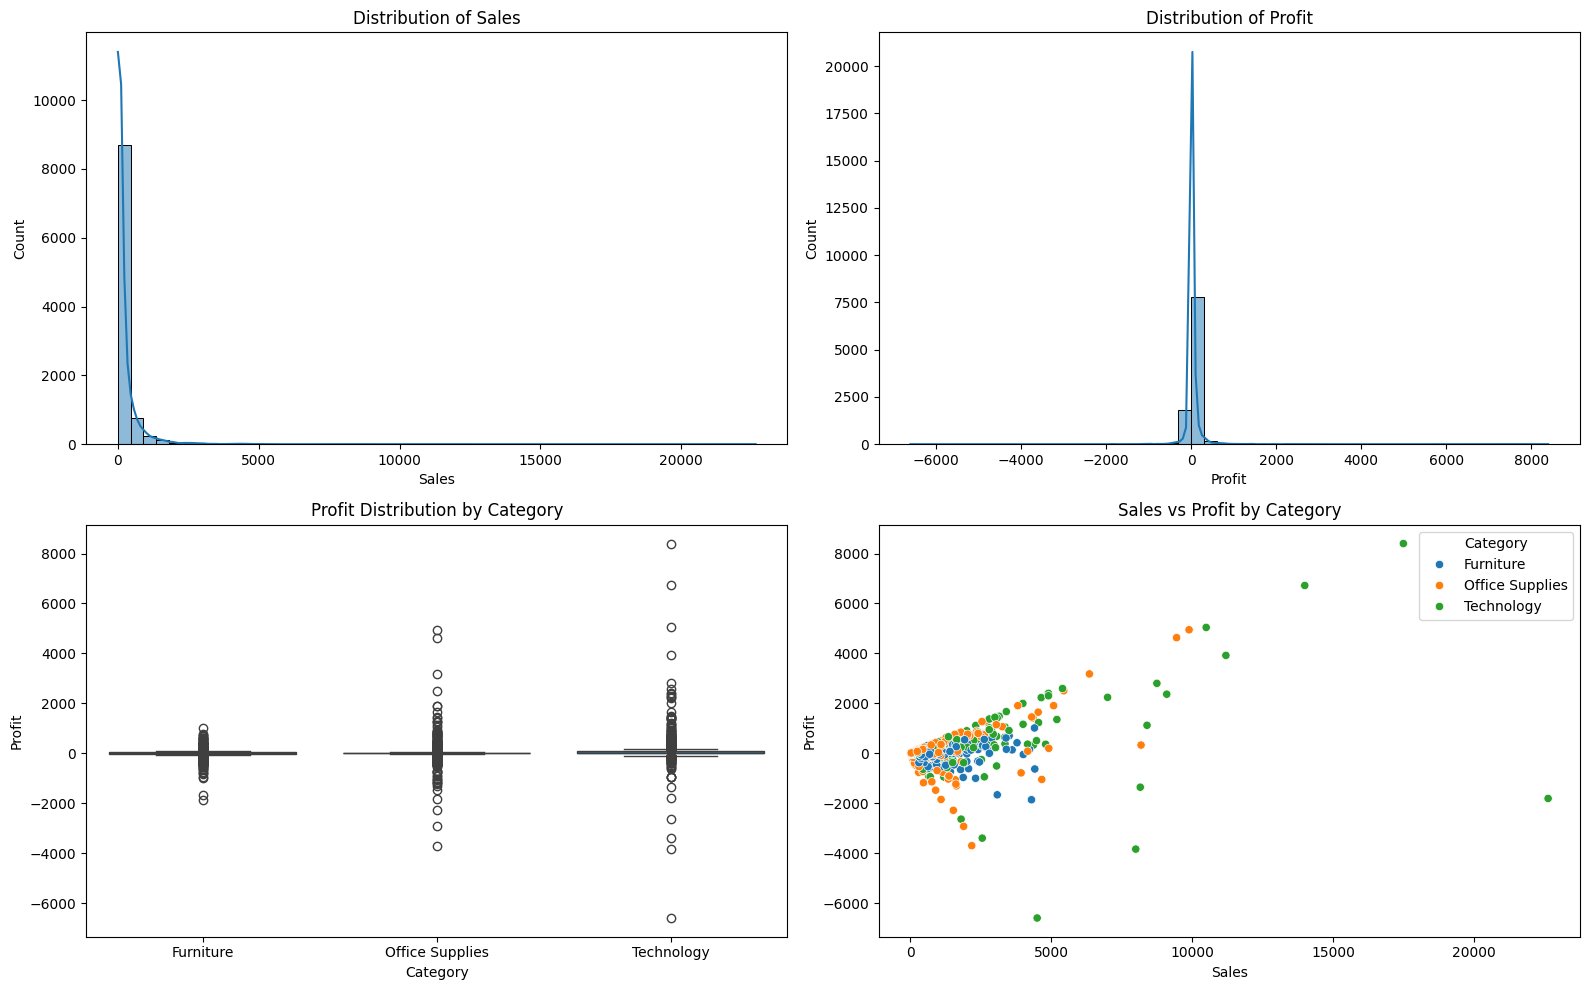

In [ ]:
# 1. Distribution plots for key numeric columns
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(superstore['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')

plt.subplot(2, 2, 2)
sns.histplot(superstore['Profit'], bins=50, kde=True)
plt.title('Distribution of Profit')

plt.subplot(2, 2, 3)
sns.boxplot(x='Category', y='Profit', data=superstore)
plt.title('Profit Distribution by Category')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=superstore)
plt.title('Sales vs Profit by Category')

plt.tight_layout()
plt.show()



##**📈 Visual Insights**

**1.Sales Distribution**
- Right-skewed distribution.
- Most of the sales values are clustered below $1000.

**2. Profit Distribution**
- Also right-skewed with notable negative values indicating losses.
- The presence of negative profit values shows that some sales lead to losses.

**3. Profit by Category (Boxplot)**
- Technology appears to have the highest spread of profit, with more extreme values (both positive and negative).

- Office Supplies has a moderate spread of profit values.

- Furniture tends to have lower variance in profit and fewer outliers.

- All categories show some outliers with large negative profits, which might indicate problematic products or discounts.

**4. Sales vs Profit (Scatterplot)**
- Sales vs. Profit by Category (Bottom Right)
There’s a positive correlation between sales and profit, but it’s not perfectly linear.

- High sales do not always mean high profit, especially visible in the Office Supplies category where some high-sale transactions lead to losses.

- Technology category (green) shows several high-profit transactions, reinforcing it as the most profitable segment.

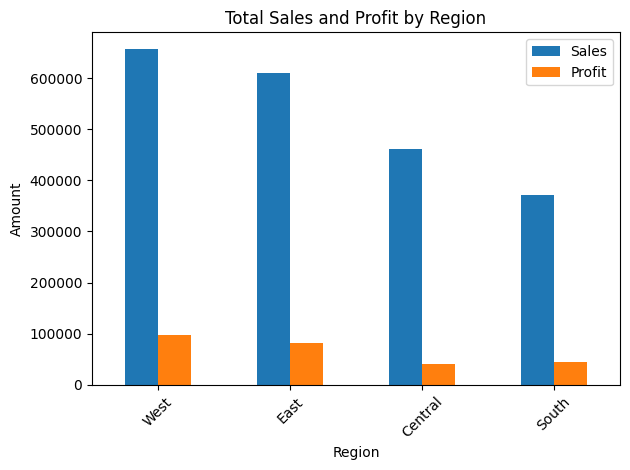

In [ ]:
# 2.Total Sales and Profit by Region
region_summary = superstore.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

fig2 = region_summary.plot(kind='bar', title='Total Sales and Profit by Region')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##**Insight**
- West and East regions lead in both total sales and profit.

- South has moderate performance.

- Central has good sales but low profit, which could indicate cost issues or inefficient discounting.

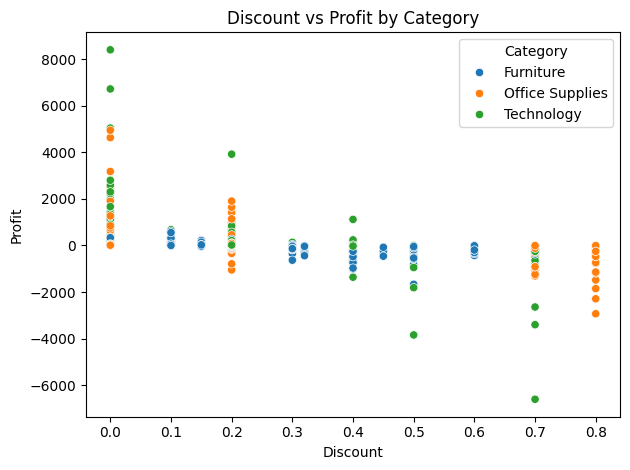

In [ ]:
# 3. Discount vs Profit
fig3 = sns.scatterplot(data=superstore, x='Discount', y='Profit', hue='Category')
plt.title("Discount vs Profit by Category")
plt.tight_layout()
plt.show()

##**Insight**
- Profit decreases sharply as discount increases.

- Discounts higher than 20% (0.2) are often associated with losses.

- No discount (0.0) transactions usually lead to better profits, regardless of the category.



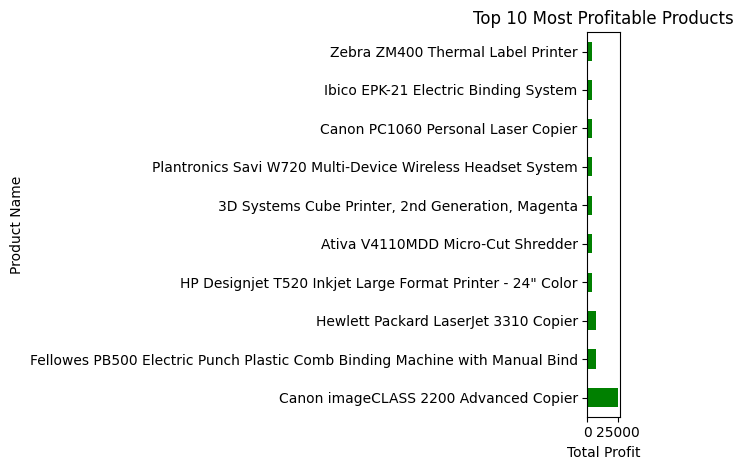

In [ ]:
# 4. Top 10 Most Profitable Products
top_profit_products = superstore.groupby('Product Name')['Profit'].sum().sort_values(ascending = False).head(10)

fig4 = top_profit_products.plot(kind='barh', title='Top 10 Most Profitable Products',color='green')
plt.xlabel('Total Profit')
plt.tight_layout()
plt.show()


##**Insight**
- Products from Office Supplies and Technology dominate the profit chart.

- These items are consistently high performers with positive margins.

- Indicates good pricing strategy or high demand for these SKUs.




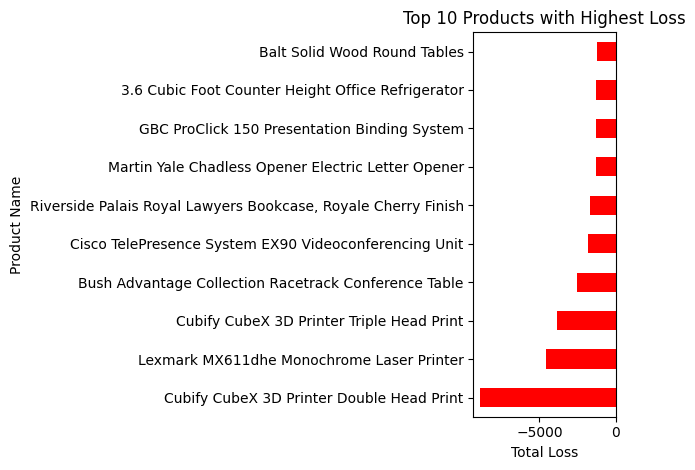

In [ ]:
# 5. Top 10 Products with Highest Loss
top_loss_products = superstore.groupby('Product Name')['Profit'].sum().sort_values().head(10)

fig5 = top_loss_products.plot(kind='barh', title='Top 10 Products with Highest Loss', color='red')
plt.xlabel('Total Loss')
plt.tight_layout()
plt.show()

##**Insight**
- Many of the highest-loss products are in the Furniture category — e.g., large tables, bookcases.

- These could be due to high discounts, logistics costs, or low margins.

- These products should be either re-priced, discounted more cautiously, or even phased out.

In [ ]:
# Create Year and Month columns
superstore['Year'] = superstore['Order Date'].dt.year
superstore['Month'] = superstore['Order Date'].dt.to_period('M').astype(str)

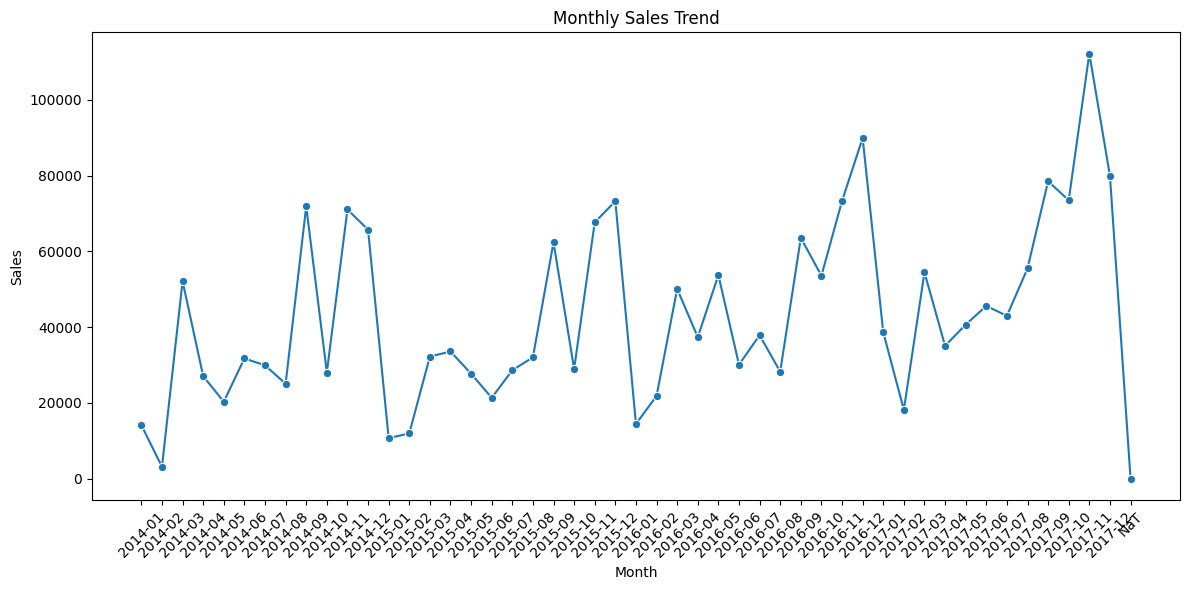

In [ ]:
# 6. Monthly Sales Trend
monthly_sales = superstore.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##**Insight**
- Sales are seasonal – they rise sharply during certain months.

- Peak sales typically occur in:

- November and December, likely due to holiday or end-of-year spending.

- March and August also show notable spikes in some years.

- Low sales are observed in early months like January and sometimes in June/July, indicating off-peak periods.

##**Business Insight**
- Target high-selling months with aggressive marketing, and offer promotions during low seasons to balance sales.


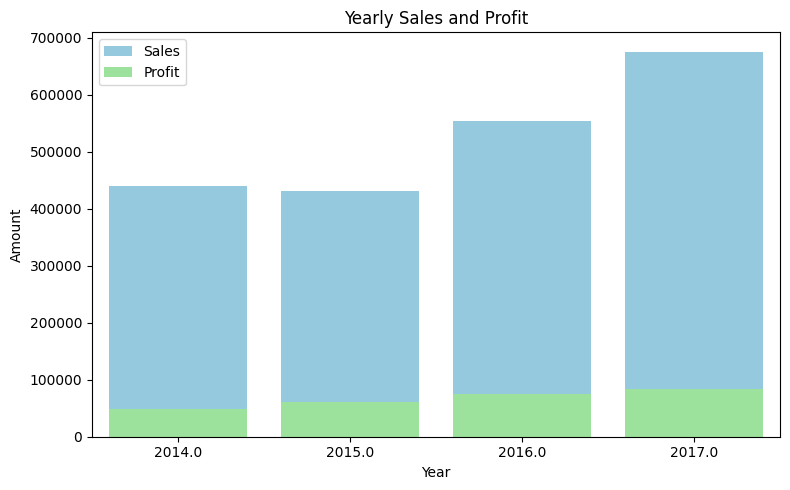

In [ ]:
# 7. Yearly Sales and Profit Summary
yearly_summary = superstore.groupby('Year')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=yearly_summary, x='Year', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=yearly_summary, x='Year', y='Profit', color='lightgreen', label='Profit')
plt.title('Yearly Sales and Profit')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()


##**Insight**
- Sales and profit both increase year-over-year, indicating overall business growth.

- However, profit doesn't always grow in proportion to sales:

 Example: One year may show high sales but a smaller profit margin, suggesting issues like over-discounting or high operating costs.

##**Business Insight**
Focus on profitability efficiency—not just increasing sales, but maintaining or improving profit margins as sales grow.



#**Conclusion**
##**Business Recommendations**

- Optimize or eliminate loss-making products (especially in Furniture).

- Limit excessive discounting — especially beyond 20%.

- Focus more on profitable regions and product lines.

- Capitalize on high-sales months with strategic campaigns.

- Improve profit margins alongside sales growth to ensure long-term sustainability.